<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,41.614401,44.610510,48.119122,63.232284,-19.747701,187.828617,208.462106,-20.633490
1,0.0,1.0,95.981912,82.436562,54.709769,81.933602,34.667421,359.729266,479.506087,-119.776820
2,0.0,2.0,90.648525,22.510229,86.731385,52.340669,73.537120,335.767928,317.363981,18.403946
3,0.0,3.0,51.139056,73.169004,63.138764,75.927015,368.268322,641.642162,336.349194,305.292968
4,0.0,4.0,47.537015,44.210071,94.349114,50.716102,22.720522,269.532824,189.878129,79.654695
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.960738,77.047717,69.171091,70.561812,-25.987718,246.753640,211.946932,34.806708
59996,999.0,56.0,40.315429,33.456628,80.360532,69.844446,-173.533340,60.443694,268.978221,-208.534527
59997,999.0,57.0,87.874011,33.305454,59.019452,57.856896,209.418029,457.473842,438.750722,18.723120
59998,999.0,58.0,25.765767,83.453158,34.200520,43.514301,77.543677,274.477424,-12.480241,286.957665


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    41.614401  44.610510  48.119122  63.232284  -19.747701   
      1.0    95.981912  82.436562  54.709769  81.933602   34.667421   
      2.0    90.648525  22.510229  86.731385  52.340669   73.537120   
      3.0    51.139056  73.169004  63.138764  75.927015  368.268322   
      4.0    47.537015  44.210071  94.349114  50.716102   22.720522   
...                ...        ...        ...        ...         ...   
999.0 55.0   45.960738  77.047717  69.171091  70.561812  -25.987718   
      56.0   40.315429  33.456628  80.360532  69.844446 -173.533340   
      57.0   87.874011  33.305454  59.019452  57.856896  209.418029   
      58.0   25.765767  83.453158  34.200520  43.514301   77.543677   
      59.0   33.543824  80.357004  92.596534  34.062828 -105.590353   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    187.828617  208.462106  -20.633490  
      1.0    359.729266  479.506087 -119.776820  
      2.0    335.767928  317.363981   18.403946  
      3.0    641.642162  336.349194  305.292968  
      4.0    269.532824  189.878129   79.654695  
...                 ...         ...         ...  
999.0 55.0   246.753640  211.946932   34.806708  
      56.0    60.443694  268.978221 -208.534527  
      57.0   457.473842  438.750722   18.723120  
      58.0   274.477424  -12.480241  286.957665  
      59.0   144.969838   64.174270   80.795568  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    41.614401  44.610510  48.119122  63.232284  -19.747701   
      1.0    95.981912  82.436562  54.709769  81.933602   34.667421   
      2.0    90.648525  22.510229  86.731385  52.340669   73.537120   
      3.0    51.139056  73.169004  63.138764  75.927015  368.268322   
      4.0    47.537015  44.210071  94.349114  50.716102   22.720522   
...                ...        ...        ...        ...         ...   
999.0 55.0   45.960738  77.047717  69.171091  70.561812  -25.987718   
      56.0   40.315429  33.456628  80.360532  69.844446 -173.533340   
      57.0   87.874011  33.305454  59.019452  57.856896  209.418029   
      58.0   25.765767  83.453158  34.200520  43.514301   77.543677   
      59.0   33.543824  80.357004  92.596534  34.062828 -105.590353   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    187.828617  208.462106  -20.633490  
      1.0    359.729266  479.506087 -119.776820  
      2.0    335.767928  317.363981   18.403946  
      3.0    641.642162  336.349194  305.292968  
      4.0    269.532824  189.878129   79.654695  
...                 ...         ...         ...  
999.0 55.0   246.753640  211.946932   34.806708  
      56.0    60.443694  268.978221 -208.534527  
      57.0   457.473842  438.750722   18.723120  
      58.0   274.477424  -12.480241  286.957665  
      59.0   144.969838   64.174270   80.795568  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,41.614401,44.610510,48.119122,63.232284,-19.747701,187.828617,208.462106,-20.633490
1,0.0,1.0,95.981912,82.436562,54.709769,81.933602,34.667421,359.729266,479.506087,-119.776820
2,0.0,2.0,90.648525,22.510229,86.731385,52.340669,73.537120,335.767928,317.363981,18.403946
3,0.0,3.0,51.139056,73.169004,63.138764,75.927015,368.268322,641.642162,336.349194,305.292968
4,0.0,4.0,47.537015,44.210071,94.349114,50.716102,22.720522,269.532824,189.878129,79.654695
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,45.960738,77.047717,69.171091,70.561812,-25.987718,246.753640,211.946932,34.806708
59996,999.0,56.0,40.315429,33.456628,80.360532,69.844446,-173.533340,60.443694,268.978221,-208.534527
59997,999.0,57.0,87.874011,33.305454,59.019452,57.856896,209.418029,457.473842,438.750722,18.723120
59998,999.0,58.0,25.765767,83.453158,34.200520,43.514301,77.543677,274.477424,-12.480241,286.957665


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    41.614401  44.610510  48.119122  63.232284  -19.747701   
      1.0    95.981912  82.436562  54.709769  81.933602   34.667421   
      2.0    90.648525  22.510229  86.731385  52.340669   73.537120   
      3.0    51.139056  73.169004  63.138764  75.927015  368.268322   
      4.0    47.537015  44.210071  94.349114  50.716102   22.720522   
...                ...        ...        ...        ...         ...   
999.0 55.0   45.960738  77.047717  69.171091  70.561812  -25.987718   
      56.0   40.315429  33.456628  80.360532  69.844446 -173.533340   
      57.0   87.874011  33.305454  59.019452  57.856896  209.418029   
      58.0   25.765767  83.453158  34.200520  43.514301   77.543677   
      59.0   33.543824  80.357004  92.596534  34.062828 -105.590353   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    187.828617  208.462106  -20.633490  
      1.0    359.729266  479.506087 -119.776820  
      2.0    335.767928  317.363981   18.403946  
      3.0    641.642162  336.349194  305.292968  
      4.0    269.532824  189.878129   79.654695  
...                 ...         ...         ...  
999.0 55.0   246.753640  211.946932   34.806708  
      56.0    60.443694  268.978221 -208.534527  
      57.0   457.473842  438.750722   18.723120  
      58.0   274.477424  -12.480241  286.957665  
      59.0   144.969838   64.174270   80.795568  

[60000 rows x 8 columns]

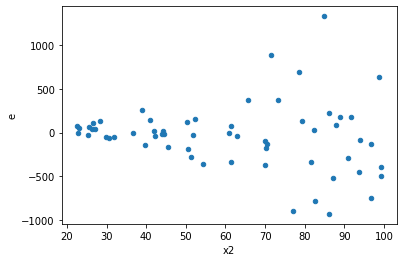

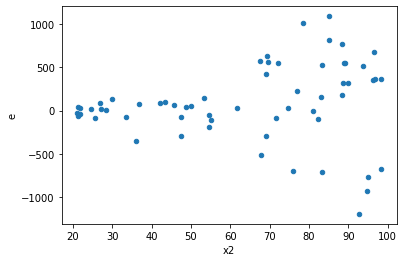

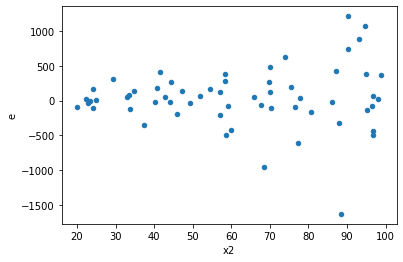

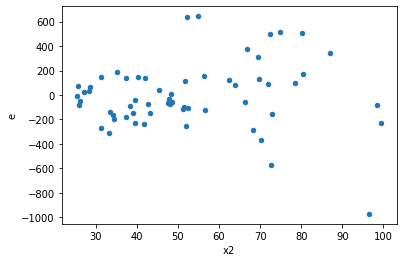

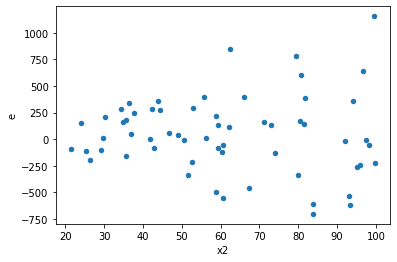

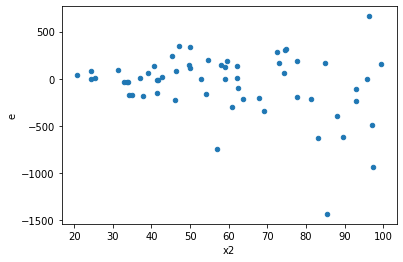

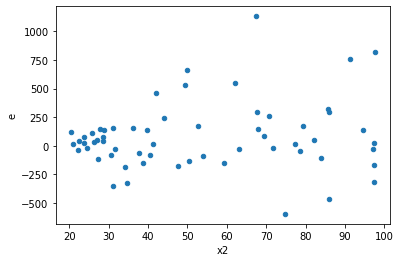

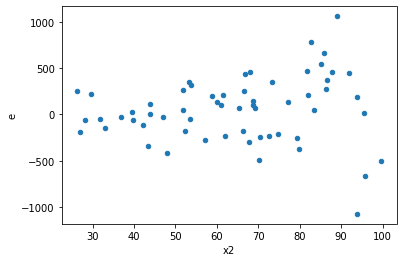

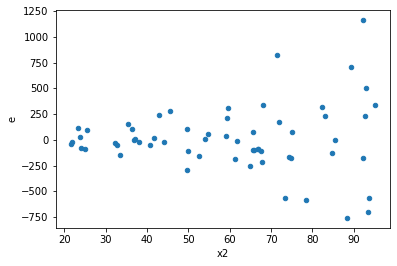

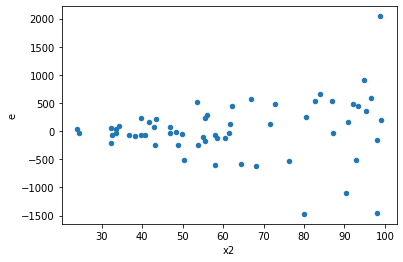

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,27.0,25.0,2116809.525361561,3669414.3965614676,78400.35279116893,146776.5758624587,1.872141777900159,0.11910153617799524,0.9404492319110024,0.05955076808899762,Reject001=1 : Homoscedasticity
3.0,27.0,25.0,1458486.536416705,2424907.4872200256,54018.01986728537,96996.29948880103,1.7956285648216503,0.14529737780259144,0.9273513110987043,0.07264868890129572,Reject001=1 : Homoscedasticity
6.0,30.0,22.0,1310660.5634165623,3183096.9933583043,43688.68544721874,144686.226970832,3.3117551029460617,0.005004765887846929,0.9974976170560765,0.0025023829439234646,Reject001=0 : Heteroscedasticity
8.0,24.0,28.0,494205.66945940966,3335278.041505925,20591.90289414207,119117.07291092588,5.784655916613321,1.9428826434131352e-05,0.9999902855867829,9.714413217065676e-06,Reject001=0 : Heteroscedasticity
10.0,26.0,26.0,1929806.6216636747,4835573.4350999575,74223.33160244903,185983.59365769068,2.5057295279312695,0.022550986270777562,0.9887245068646112,0.011275493135388781,Reject001=1 : Homoscedasticity
11.0,25.0,27.0,2432750.977007789,4873747.898194678,97310.03908031156,180509.18141461772,1.8549903290619436,0.11920856681086955,0.9403957165945652,0.05960428340543478,Reject001=1 : Homoscedasticity
12.0,27.0,25.0,3271102.7167801186,3901484.4438294056,121151.95247333773,156059.37775317623,1.2881292836574028,0.5274300110259362,0.7362849944870319,0.2637150055129681,Reject001=1 : Homoscedasticity
13.0,32.0,20.0,1450084.487342118,3199849.869706753,45315.14022944119,159992.49348533765,3.5306631001307314,0.004370467986342552,0.9978147660068287,0.002185233993171276,Reject001=0 : Heteroscedasticity
14.0,17.0,35.0,549149.2479769676,7711210.2071235385,32302.896939821625,220320.29163210109,6.820449944243226,1.8053967494324752e-06,0.9999990973016253,9.026983747162376e-07,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,27.0,25.0,2116809.525361561,3669414.3965614676,78400.35279116893,146776.5758624587,1.872141777900159,0.11910153617799524,Reject001=1 : Homoscedasticity
1.0,29.0,23.0,9347248.122755589,829714.4866261481,322318.9007846755,36074.54289678905,0.11192189725444793,1.4790003322194326e-07,Reject001=0 : Heteroscedasticity
2.0,24.0,28.0,7694016.758217663,1327762.1295371088,320584.0315924026,47420.076054896745,0.14791777313221777,1.0364485642672875e-05,Reject001=0 : Heteroscedasticity
3.0,27.0,25.0,1458486.536416705,2424907.4872200256,54018.01986728537,96996.29948880103,1.7956285648216503,0.14529737780259144,Reject001=1 : Homoscedasticity
4.0,30.0,22.0,4165499.091167439,1630515.2101030448,138849.9697055813,74114.32773195658,0.5337727324615862,0.10976345340814671,Reject001=1 : Homoscedasticity
5.0,29.0,23.0,2988717.9395927247,1996214.1990542538,103059.23929630085,86791.92169801104,0.8421556600905971,0.6546573321311056,Reject001=1 : Homoscedasticity
6.0,30.0,22.0,1310660.5634165623,3183096.9933583043,43688.68544721874,144686.226970832,3.3117551029460617,0.005004765887846929,Reject001=0 : Heteroscedasticity
7.0,28.0,24.0,4424375.520748008,1711879.6761001658,158013.411455286,71328.3198375069,0.4514067456716553,0.04474346818559512,Reject001=1 : Homoscedasticity
8.0,24.0,28.0,494205.66945940966,3335278.041505925,20591.90289414207,119117.07291092588,5.784655916613321,1.9428826434131352e-05,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      663
Reject001=0 : Heteroscedasticity    337
Name: Result_test, dtype: int64